In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset into a DataFrame
df = pd.read_csv("data_canada.csv")

In [ ]:
# Define conflict-driven countries
conflict_countries = ["Afghanistan", "Iraq", "Somalia", "Sudan"]

# Filter data for selected countries
df_conflict = df[df["Country"].isin(conflict_countries)]

# Extract year columns
years = [str(year) for year in range(1980, 2025)]

# Select relevant columns
df_conflict = df_conflict[["Country"] + years]

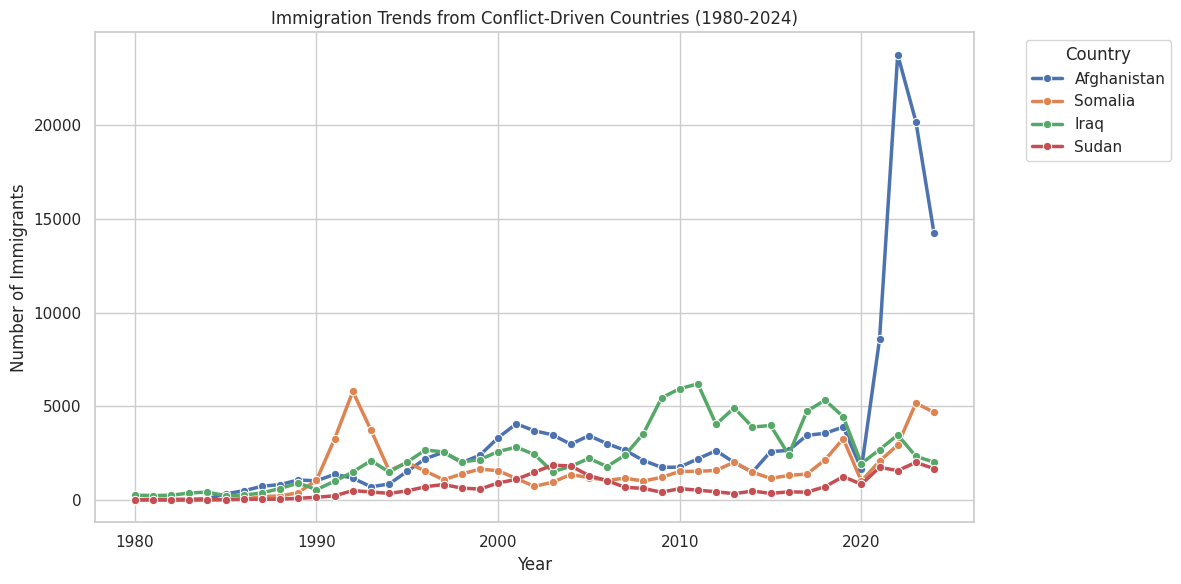

In [ ]:
# Melt the DataFrame for seaborn compatibility
df_conflict_melted = df_conflict.melt(id_vars=["Country"], var_name="Year", value_name="Immigrants")
df_conflict_melted["Year"] = df_conflict_melted["Year"].astype(int)

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_conflict_melted, x="Year", y="Immigrants", hue="Country", marker="o", linewidth=2.5)

# Customize plot
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")
plt.title("Immigration Trends from Conflict-Driven Countries (1980-2024)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Remove 'World' row if it exists
df = df[df["Continent"] != "World"]

# Summing up the total number of immigrants per continent
df_continent = df.groupby("Continent").sum(numeric_only=True)

# Compute total immigration per continent
df_continent["Total"] = df_continent.iloc[:, 3:].sum(axis=1)

# Prepare data for pie chart
labels = df_continent.index
sizes = df_continent["Total"]


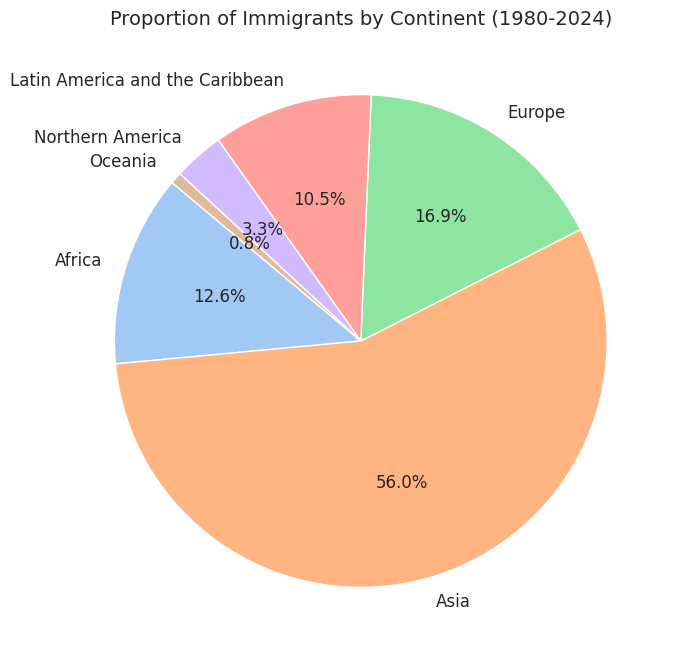

In [ ]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel", len(labels))  # Using Seaborn pastel color palette
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 12})

# Add title
plt.title("Proportion of Immigrants by Continent (1980-2024)", fontsize=14)

# Show plot
plt.show()

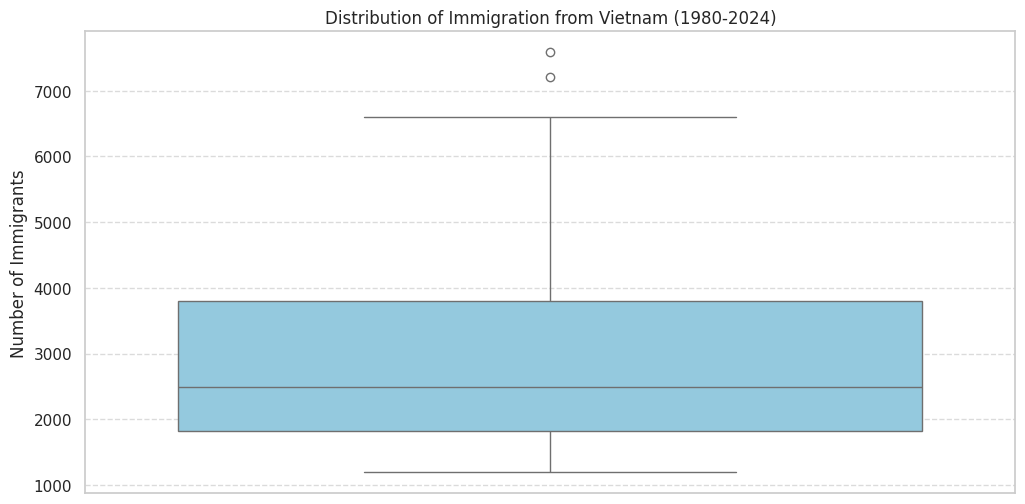

In [ ]:
# Filter data for Vietnam
df_vietnam = df[df["Country"] == "Viet Nam"]

# Identify valid year columns (excluding non-year columns like "ISO Code")
years = [col for col in df_vietnam.columns if col.isdigit()]

# Convert the dataset into a long format
df_vietnam_melted = df_vietnam.melt(id_vars=["Country"], value_vars=years, var_name="Year", value_name="Immigrants")
df_vietnam_melted["Year"] = df_vietnam_melted["Year"].astype(int)  # Convert Year to integer

# Create a box plot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(y=df_vietnam_melted["Immigrants"], color="skyblue")

plt.ylabel("Number of Immigrants")
plt.title("Distribution of Immigration from Vietnam (1980-2024)")
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()